# Global random audiogram and p50 values

In [1]:
import os.path as op
import matplotlib.pyplot as plt

from copy import deepcopy

from scripts.utils import *
from funcs.global_random_audiogram import DataFormatter, DataProcessor
from funcs.plots import VisualChecksP50

### Set paths and parameters

In [2]:
data_path = get_path("dataframes")
fig_dir = get_path("figures")

audiograms_input_file = "thresholds-3AFC_freqs.pkl"
random_audiograms_output_file = "global_random_audiograms.pkl"

overwrite_existing = True

no_init = False  # decide whether to include init data in p50 estimation

xfreqs = list(np.geomspace(125, 8000, 100))
AFC_freqs = [125, 250, 500, 750, 1000, 1500, 2000, 3000, 4000, 6000, 8000]

### Load and reformat data

In [3]:
# Load data
thresholds_data = pd.read_pickle(op.join(data_path, audiograms_input_file))

# Compact data: create df with one row per audiogram (10 rows/participant)
short_data = DataFormatter.shorten_data(thresholds_data, AFC_freqs)

# Explode data: create df with one row per trial
trials_data = deepcopy(DataFormatter.lengthen_data(short_data))

trials_data.head()

,participant,paradigm,pred,time_pred,freq_pred,tested_frequencies,tested_levels,responses,n_tone,len_init,is_init,frequencies,thresholds,mean_threshold
0,cbtxie,3AFC,3AFC,None,None,1000.0,30.0,1.0,0,None,None,"[125.0, 189.4645708137996, 287.17458874925876,...","[6.9, 6.2, 0.0, -1.2, -1.2, 0.6, -5.0, -5.0, -...",-2.154545
1,cbtxie,3AFC,3AFC,None,None,1000.0,30.0,1.0,1,None,None,"[125.0, 189.4645708137996, 287.17458874925876,...","[6.9, 6.2, 0.0, -1.2, -1.2, 0.6, -5.0, -5.0, -...",-2.154545
2,cbtxie,3AFC,3AFC,None,None,1000.0,10.0,1.0,2,None,None,"[125.0, 189.4645708137996, 287.17458874925876,...","[6.9, 6.2, 0.0, -1.2, -1.2, 0.6, -5.0, -5.0, -...",-2.154545
3,cbtxie,3AFC,3AFC,None,None,1000.0,10.0,1.0,3,None,None,"[125.0, 189.4645708137996, 287.17458874925876,...","[6.9, 6.2, 0.0, -1.2, -1.2, 0.6, -5.0, -5.0, -...",-2.154545
4,cbtxie,3AFC,3AFC,None,None,1000.0,0.0,1.0,4,None,None,"[125.0, 189.4645708137996, 287.17458874925876,...","[6.9, 6.2, 0.0, -1.2, -1.2, 0.6, -5.0, -5.0, -...",-2.154545


### Global random audiograms

Filter trials from all the randomized conditions (Randomized task, Continuous/R and Cluster/R.

Make API requests for global random audiograms. Resample the obtained audiogram to 100 datapoints and save the dataframe to a pickle file if `overwrite_existing`.

Otherwise, load the existing global random audiograms from the pickle file.

In [4]:
output_abspath = op.join(data_path, random_audiograms_output_file)

if overwrite_existing or not op.isfile(output_abspath):
    print(f"Making API requests for the mommy audiograms. This can take a couple of minutes...")

    # Filter data from all random conditions
    random_trials_data = trials_data.loc[trials_data.pred.isin(['Bayesian', 'none'])]

    # Make the API compute the audiograms from the selected data and resample
    random_audiograms = DataProcessor.request_global_audiograms(random_trials_data, xfreqs)

    # Save global random audiograms to PKL file
    random_audiograms.to_pickle(output_abspath)
    del random_trials_data

else:
    print(f"Loading previously saved global random audiograms from '{random_audiograms_output_file}'...")
    random_audiograms = pd.read_pickle(output_abspath)

random_audiograms.head()

Making API requests for the mommy audiograms. This can take a couple of minutes...
Computing global random audiogram for cbtxie...
Computing global random audiogram for cmzntn...
Computing global random audiogram for cwzopc...
Computing global random audiogram for ddmfvc...
Computing global random audiogram for eqdcwr...
Computing global random audiogram for erfnpg...
Computing global random audiogram for hnxrev...
Computing global random audiogram for hoavur...
Computing global random audiogram for klxufm...
Computing global random audiogram for luctew...
Computing global random audiogram for moiern...
Computing global random audiogram for nefynm...
Computing global random audiogram for nfsmrp...
Computing global random audiogram for nlhglm...
Computing global random audiogram for nunamh...
Computing global random audiogram for ofgjwt...
Computing global random audiogram for qmbami...
Computing global random audiogram for quicsb...
Computing global random audiogram for quvsxs...
Compu

,participant,random_tested_frequencies,random_tested_levels,random_responses,random_thresholds,frequencies,random_ntones
0,cbtxie,"[1000.0, 1000.0, 1000.0, 1000.0, 1500.0, 1500....","[60.0, 40.0, 20.0, 0.0, 10.0, -10.0, 10.0, -10...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[11.91284608862206, 11.196718051727396, 10.437...","[125.0, 130.36297268079934, 135.95603716939888...","[[Bayesian, 68], [Cluster, 64], [Continuous, 71]]"
0,cmzntn,"[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1500....","[60.0, 40.0, 20.0, 0.0, -20.0, -10.0, 10.0, -1...","[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...","[-2.3236629056248708, -2.376217078207924, -2.4...","[125.0, 130.36297268079934, 135.95603716939888...","[[Bayesian, 51], [Cluster, 34], [Continuous, 83]]"
0,cwzopc,"[1000.0, 1000.0, 1000.0, 1000.0, 1500.0, 1500....","[60.0, 40.0, 20.0, 0.0, 10.0, 30.0, 10.0, -10....","[1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ...","[0.054700303594831294, -0.2915862106027919, -0...","[125.0, 130.36297268079934, 135.95603716939888...","[[Bayesian, 53], [Cluster, 64], [Continuous, 61]]"
0,ddmfvc,"[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1500....","[60.0, 40.0, 20.0, 0.0, -20.0, -10.0, 10.0, -1...","[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...","[7.9477199938524885, 6.843204649103763, 5.7907...","[125.0, 130.36297268079934, 135.95603716939888...","[[Bayesian, 56], [Cluster, 38], [Continuous, 71]]"
0,eqdcwr,"[1000.0, 1000.0, 1000.0, 1000.0, 1500.0, 1500....","[56.7, 36.7, 16.7, -3.3, 6.7, 26.7, 6.7, -13.3...","[1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ...","[-1.5271335316371029, -2.0342476558485787, -2....","[125.0, 130.36297268079934, 135.95603716939888...","[[Bayesian, 51], [Cluster, 50], [Continuous, 65]]"


### Distances with random threshold

For each tone presented during the experiment, compute the distance

In [5]:
# remove trials of initialization phase from Cluster and Continuous
if no_init:
    trials_data = trials_data[~((trials_data.paradigm.isin(['Continuous', 'Cluster'])) & (trials_data.is_init == True))]

# Insert new columns: for each tone tested, get random threshold and compute distance
trials_data.insert(9, 'random_threshold', np.zeros(len(trials_data)))
trials_data.insert(10, 'random_distance', np.zeros(len(trials_data)))

trials_data.reset_index(inplace=True)

In [6]:
def compute_random_threshold(row):
    participant_data = random_audiograms_dict[row.participant]
    random_audiogram = participant_data['random_thresholds']
    audiogram_frequencies = participant_data['frequencies']
    freq = row.tested_frequencies
    return random_audiogram[audiogram_frequencies.index(freq)] if freq in audiogram_frequencies else interp(freq, audiogram_frequencies, random_audiogram)

# Create dictionary for quick access to participant data
random_audiograms_dict = random_audiograms.set_index('participant')[['random_thresholds', 'frequencies']].to_dict('index')

# Compute the random threshold for the frequency of each trial
trials_data['random_threshold'] = trials_data.apply(compute_random_threshold, axis=1)

# Compute the distance
trials_data['random_distance'] = trials_data.tested_levels - trials_data.random_threshold

# merge new data to short_data
short_data = DataFormatter.add_distances_to_short_data(short_data, trials_data)

del random_audiograms_dict

### Logistic regression and p50

Compute **"psychometric" curves** by fitting a sigmoid to the participant's response as a function of the presented tone's distance from the global random threshold.
Interpolate **p50 values** (i.e. the threshold distance in dB corresponding to a probability of detection = 50%).

Loop through each paradigm in trials_data:
- For each paradigm, loop through each prediction condition:
  - For each prediction condition, loop through the participants:
     - **Fit a logistic regression model to each participant's responses**.
     - **Compute individual p50 values**.
     - Check for any anomalies. Plot anomaly and set p50 to NaN if:
          - the sigmoid is inverted (decreasing probability of detection with increasing dB level),
          - the computed p50 value is outside of the range of tested tones.
 - Compute the average of the sigmoids and SEM across (non-problematic) participants for each condition.

---------------
3AFC

---------------
BAYESIAN

---------------
CLUSTER

---------------
CONTINUOUS



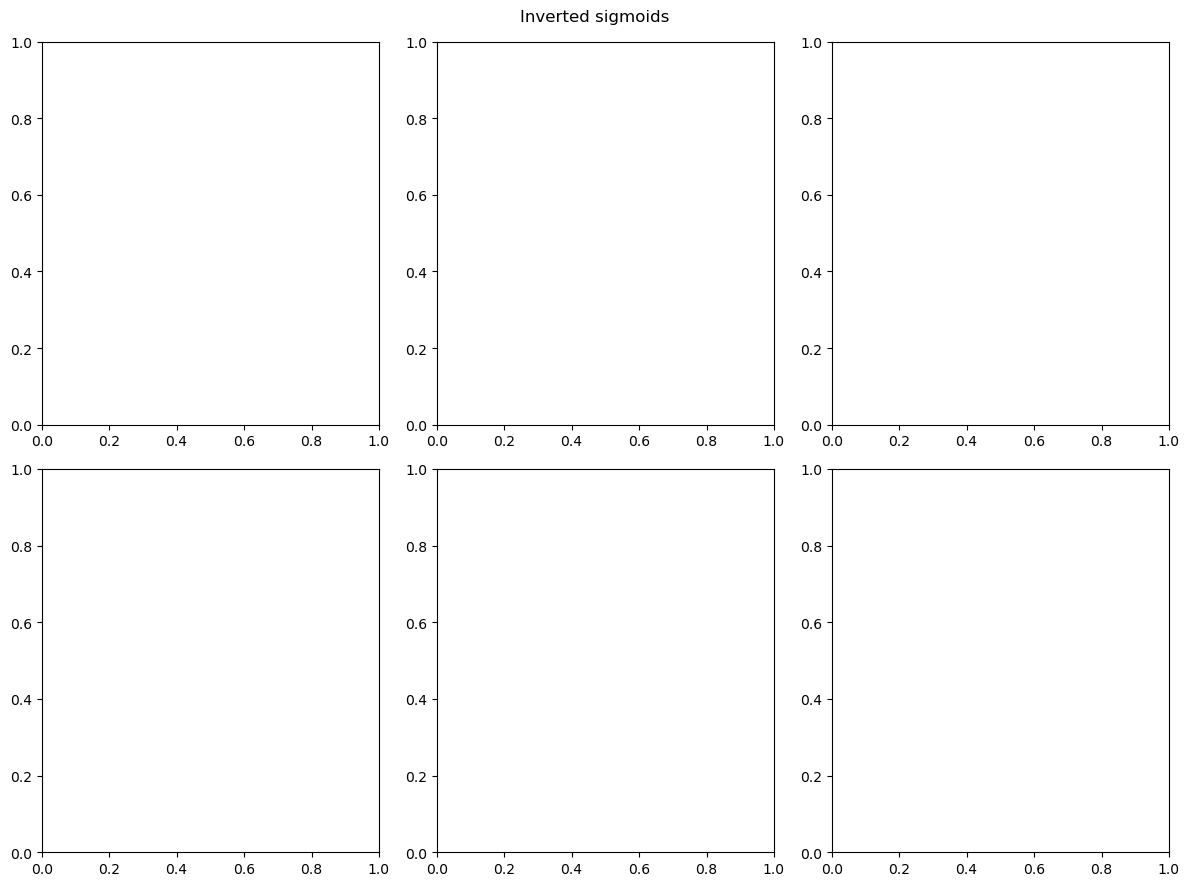

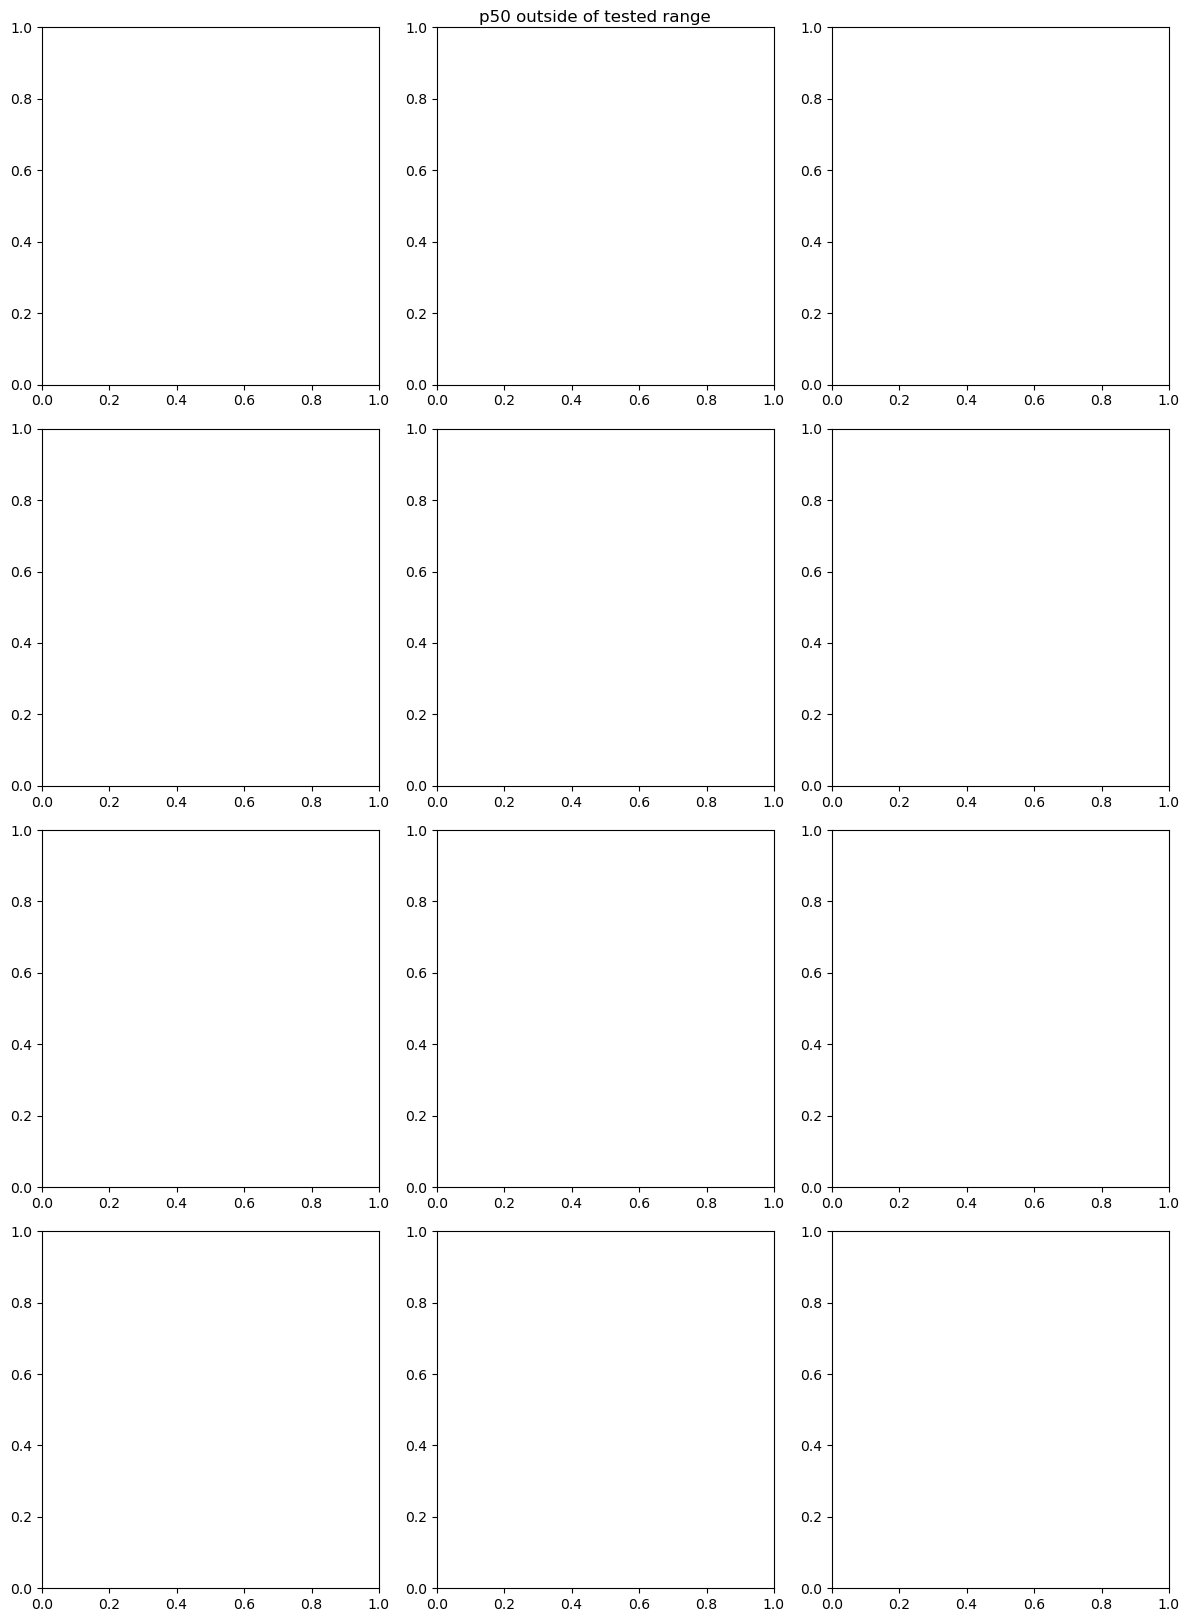

In [7]:
fig_inverted, axs_inverted = plt.subplots(nrows=2, ncols=3, figsize=[12, 9])
axs_inverted = axs_inverted.flatten()
plt.suptitle("Inverted sigmoids")

fig_p50, axs_p50 = plt.subplots(nrows=4, ncols=3, figsize=[12, 16.5])
axs_p50 = axs_p50.flatten()
plt.suptitle("p50 outside of tested range")

subplot_counters = {'Inverted sigmoid': 0, 'p50 outside range': 0}
problematic_participants = {}

pseudo_psychometric_curves = pd.DataFrame()

for paradigm, paradigm_group in trials_data.groupby('paradigm'):
    print(f"---------------\n{paradigm.upper()}\n")

    problematic_participants[paradigm] = {"Inverted sigmoid": [],
                                          "p50 outside range": []}

    curve, problematic_participants[paradigm], subplot_counters = DataProcessor().get_sigmoid_and_p50(
        paradigm_group, paradigm, problematic_participants[paradigm], subplot_counters, axs_inverted, axs_p50
    )

    pseudo_psychometric_curves = pd.concat([pseudo_psychometric_curves, curve])

fig_inverted.tight_layout()
fig_p50.tight_layout()

del subplot_counters, fig_inverted, fig_p50, axs_inverted, axs_p50, curve

### Summarize issues

In [8]:
for paradigm, anomaly_counts in problematic_participants.items():
    print(f"- {paradigm}:")

    if all(len(participants) == 0 for participants in anomaly_counts.values()):
        print("No issues\n")
    else:
        for anomaly_type, participants in anomaly_counts.items():
            if participants: # check if the list is not empty
                print(f"{anomaly_type} for {len(participants)} participants: {participants}")

        # Compute and print total number of unique problematic participants for each paradigm
        total_participants = set()
        for participants in anomaly_counts.values():
            total_participants.update(participants)
        print(f"Total unique problematic participants in {paradigm}: {len(total_participants)}\n")

del anomaly_type, anomaly_counts, participants, total_participants

- 3AFC:
No issues

- Bayesian:
No issues

- Cluster:
No issues

- Continuous:
No issues



NameError: name 'anomaly_type' is not defined

### Get average and SEM of sigmoids across participants

Compute the average sigmoid and SEM across (non-problematic) participants for each condition.

In [9]:
average_and_sem = pseudo_psychometric_curves.loc[~pseudo_psychometric_curves.problematic].groupby(['paradigm', 'pred', 'random_distance'])['sigmoid_probas'].agg(['mean', 'sem']).reset_index()

pseudo_psychometric_curves = pd.merge(pseudo_psychometric_curves, average_and_sem, how='left', on=['paradigm', 'pred', 'random_distance'])
pseudo_psychometric_curves.rename(columns={"mean": "sigmoid_mean", "sem": "sigmoid_sem"}, inplace=True)

### Save dataframes

In [10]:
pseudo_psychometric_curves.to_pickle(op.join(data_path, "sigmoid_data.pkl"))

trials_data.to_pickle(op.join(data_path, "individual_trials_data.pkl"))

### Plot all non-problematic results

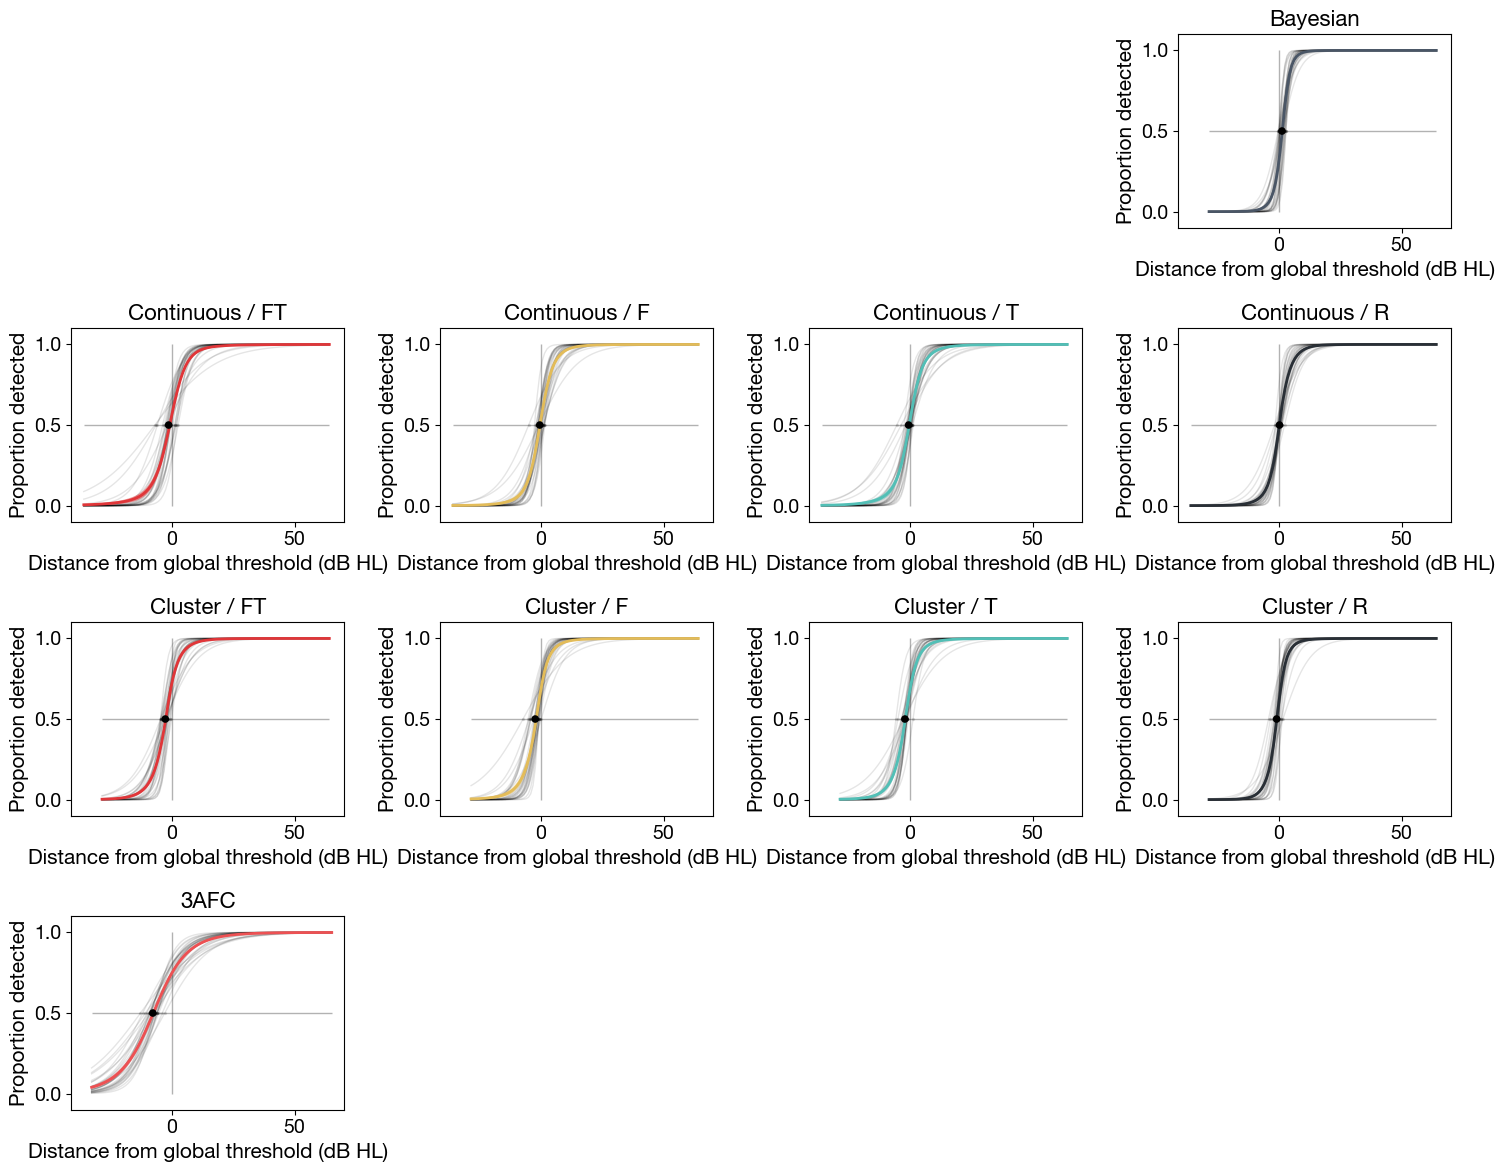

In [11]:
VisualChecksP50.plot_all_sigmoids(pseudo_psychometric_curves)